In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn # to use latex style in matplotlib
import scienceplots
plt.style.use(['science','nature'])
#import tikzplotlib
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['PT Serif']

import pyvista as pv
import tqdm
from pathlib import Path
import sys
sys.path.append('../')
import aorta_lib.segmentation.data as segdata

import aorta_lib.hemodyn.data as data
import aorta_lib.hemodyn.train_and_analyze_ROM as tr
from aorta_lib import utils


/opt/miniconda3/envs/monai/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.2.1 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
df = pd.read_excel('../aorta_lib/hemodyn/odir_noLATIN1/df_results_all_folds.xlsx', index_col=0)
groups = []
for name in df['name']:
  groups.append(data.get_sample_group(name))
df['group'] = groups

In [3]:
#df_grouped = df[['fold','rmse','abse','array_name']]
df_grouped = df[['fold','abse','array_name']]
per_fold_mean = df_grouped.groupby(['array_name',"fold"]).mean()
per_fold_std = df_grouped.groupby(['array_name',"fold"]).std()
per_fold_metrics = pd.merge(per_fold_mean, per_fold_std, on=["fold",'array_name'], suffixes=["_mean", "_std"])
per_fold_metrics


,,abse_mean,abse_std
fold,array_name,,
0,osi,0.072473,0.019272
1,osi,0.071764,0.021060
2,osi,0.075945,0.019588
3,osi,0.074176,0.020305
4,osi,0.069721,0.011378
0,tawss,0.325551,0.252127
1,tawss,0.309918,0.193198
2,tawss,0.330505,0.200789
3,tawss,0.290596,0.129582


In [4]:
#df_grouped = df[['fold','rmse','abse','array_name']]
df_grouped = df[['fold','abse','array_name']]
per_fold_mean = df_grouped.groupby(['array_name',"fold"]).mean()

tot_mean = per_fold_mean.groupby(['array_name']).mean()
tot_std = per_fold_mean.groupby(['array_name']).std()

tot_metrics = pd.merge(tot_mean, tot_std, on=['array_name'], suffixes=["_mean", "_std"])
tot_metrics

,abse_mean,abse_std
array_name,,
osi,0.072816,0.002369
tawss,0.305943,0.024057
wss_sis,1.116428,0.082991


In [5]:
#df_grouped = df[['fold','rmse','abse','array_name']]
df_grouped = df[['fold','nmae','array_name']]
per_fold_mean = df_grouped.groupby(['array_name',"fold"]).mean()
per_fold_std = df_grouped.groupby(['array_name',"fold"]).std()
per_fold_metrics = pd.merge(per_fold_mean, per_fold_std, on=["fold",'array_name'], suffixes=["_mean", "_std"])
per_fold_metrics


,,nmae_mean,nmae_std
fold,array_name,,
0,osi,0.147584,0.039058
1,osi,0.146094,0.042571
2,osi,0.154794,0.039979
3,osi,0.151042,0.041447
4,osi,0.142155,0.023364
0,tawss,0.072804,0.038369
1,tawss,0.075965,0.047040
2,tawss,0.070732,0.032391
3,tawss,0.070632,0.037637


In [6]:
#df_grouped = df[['fold','rmse','abse','array_name']]
df_grouped = df[['fold','nmae','array_name']]
per_fold_mean = df_grouped.groupby(['array_name',"fold"]).mean()

tot_mean = per_fold_mean.groupby(['array_name']).mean()
tot_std = per_fold_mean.groupby(['array_name']).std()

tot_metrics = pd.merge(tot_mean, tot_std, on=['array_name'], suffixes=["_mean", "_std"])
tot_metrics

,nmae_mean,nmae_std
array_name,,
osi,0.148334,0.004817
tawss,0.071007,0.004039
wss_sis,0.052850,0.002020


## plot scatter error vs dist

In [126]:
dx1_in = 0
dx1_en = 0.7

bins1 = np.linspace(x.min()+(x.max()-x.min())*dx1_in, x.min()+(x.max()-x.min())*dx1_en, 6)
bins2 = [x.max()]
bins_ = bins1.tolist() + bins2
bins_

[2.92782,
 8.381237200000001,
 13.834654400000002,
 19.288071600000002,
 24.741488800000003,
 30.194906000000003,
 41.8808]

/tmp/ipykernel_206275/3433410966.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


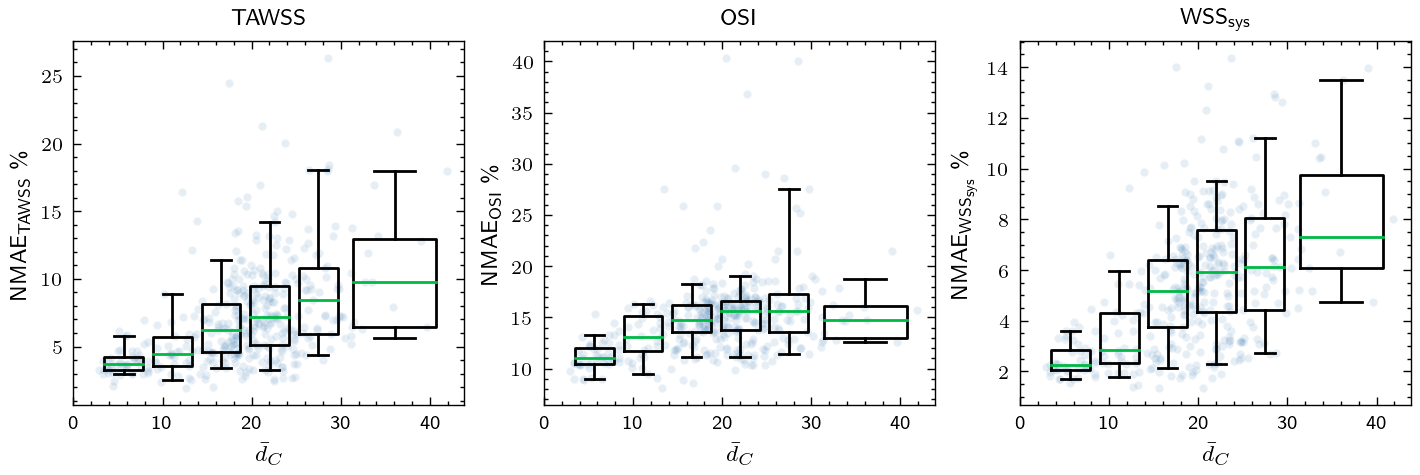

In [167]:
from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble='\\usepackage{amsmath}')
fontsize = 10
mpl.rcParams['font.size'] = fontsize

mpl.rcParams['font.size'] = 8
mpl.rcParams["axes.titlesize"] = 8
mpl.rcParams["axes.labelsize"] = 8

array_name_to_plot = ['tawss', 'osi', 'wss_sis']
labels = ['TAWSS', 'OSI', 'WSS$_{\\text{sys}}$']
lims = [[None,None],[None,None],[None,None]]
#units = [' [Pa]', '', ' [Pa]']
units = [' \%']*3

figure_size = np.array((180,60)) * 0.0393701 # specify in mm and then convert to inches

fig, axs = plt.subplots(1,3,figsize=figure_size, dpi=200,layout="constrained" )
for kk, array_name in enumerate(array_name_to_plot):
  j=3 # dist3
  df_ = df[df['array_name']==array_name]
  x = df_[f'dist{j}'].to_numpy()
  y = df_['nmae'].to_numpy()*100
  axs[kk].scatter(x, y, alpha=0.1, edgecolors='white')

  bins, means, stds, bin_idx = utils.binned_stat(x, y, bins_)
  nbins = len(bins_)-1
  binned = [list() for i in range(nbins)]
  for ii, bin in enumerate(bin_idx):
    binned[bin].append(y[ii])

  axs[kk].boxplot(binned,0,'',
             positions=bins,
             widths=np.diff(bins_)*0.8,
             vert=True,  # vertical box alignment
             whis=[5,95],
  )

  axs[kk].set_xlabel('$\\bar{d}_C$')
  axs[kk].set_ylabel('NMAE$_{{\\text{{{}}}}}$'.format(labels[kk])+units[kk])
  axs[kk].set_ylim(lims[kk])
  axs[kk].set_title(labels[kk])

  axs[kk].set_xticks(range(0,50,10))
  axs[kk].set_xticklabels(range(0,50,10))


#ax.legend(shadow=True, frameon=True)
fig.savefig(f'error_vs_dist_all.pdf', dpi=300)
fig.show()

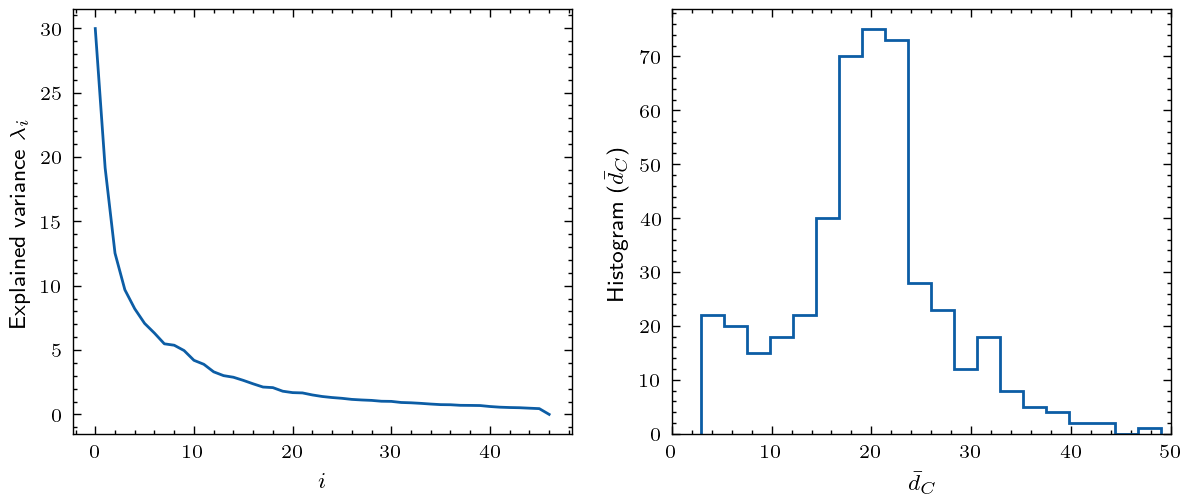

In [171]:
whole_dataset = data.read_datalist(
  '../aorta_lib/hemodyn/datasetROM_new.json', folds=range(5),
   dataRoot='alignedDatasetBiomarkers_new/', keys_to_edit=["model"],
)
for s in whole_dataset:
  s['omega'] = tr.read_shape_coeff_from_dict(s['coeffs'], 25)
  s['group'] = data.get_sample_group(s['name'])

df_whole = pd.DataFrame(whole_dataset)
#df_whole = df_whole[df_whole['group']=='RG']

omega_dataset = np.array([*df_whole.loc[:,'omega']])
dists, _ = tr.build_knn(omega_dataset, omega_dataset, tr.distance_shapes, k=4)
dists = dists[:,1:].mean(-1)
from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble='\\usepackage{amsmath}')
fontsize = 10
mpl.rcParams['font.size'] = fontsize

mpl.rcParams['font.size'] = 8
mpl.rcParams["axes.titlesize"] = 8
mpl.rcParams["axes.labelsize"] = 8

figure_size = np.array((180,70)) * 0.0393701 # specify in mm and then convert to inches
fig, axs = plt.subplots(1,2,figsize=figure_size, dpi=200)

axs[0].plot(tr.ssm_std)
axs[0].set_xlabel('$i$')
axs[0].set_ylabel('Explained variance $\\lambda_i$')
axs[1].hist(dists, bins=20, density=False, histtype='step')
axs[1].set_xlabel('$\\bar{d}_C$')
axs[1].set_ylabel('Histogram ($\\bar{d}_C$)')
axs[1].set_xlim([0,50])

fig.savefig('expl_var_and_dc_histogram.pdf', dpi=300)

In [88]:
bins_trues, av_trues = [], []
bins_roms, av_roms = [], []
bins_errors, av_errors = [], []
nbins = 31
hemo_odir_vmtk = Path('../aorta_lib/hemodyn/odir_noLATIN1_evaluate_vmtk')
samples = sorted(list(hemo_odir_vmtk.glob('*[!cl].vtp')))
for i in tqdm.tqdm(
        range(len(samples)),
        desc='Loading simulations', ncols=100):
  #print(samples[i])
  sample = samples[i]
  m = pv.read(sample)

  long = m['AbscissaMetric']
  bins_true, av_true = utils.binned_stat(long, m['tawss'], nbins)
  bins_rom, av_rom = utils.binned_stat(long, m['tawss_ROM_val'], nbins)
  bins_error, av_error = utils.binned_stat(long, (np.abs(m['tawss']-m['tawss_ROM_val'])/(m['tawss'].max()-m['tawss'].min()).T).T, nbins)

  bins_trues.append(bins_true)
  bins_roms.append(bins_rom)
  av_trues.append(av_true)
  av_roms.append(av_rom)
  bins_errors.append(bins_error)
  av_errors.append(av_error)



Loading simulations: 100%|████████████████████████████████████████| 416/416 [00:15<00:00, 26.48it/s]


In [89]:
av_trues = np.array(av_trues)
av_roms = np.array(av_roms)
bins_trues = np.array(bins_trues)

av_errors = np.array(av_errors)
bins_errors = np.array(bins_errors)

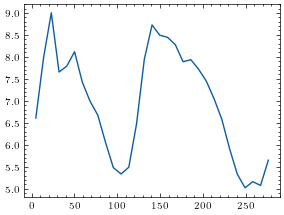

In [93]:
plt.plot(bins_errors.mean(0),av_errors.mean(0)*100)

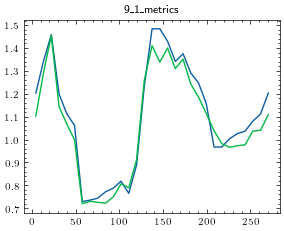

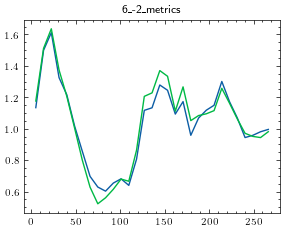

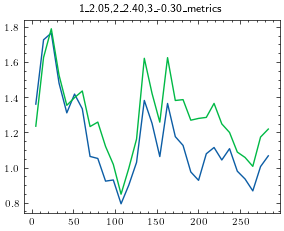

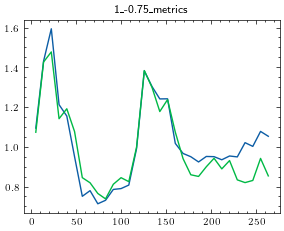

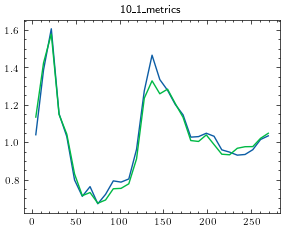

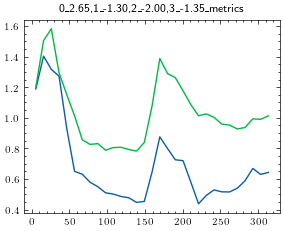

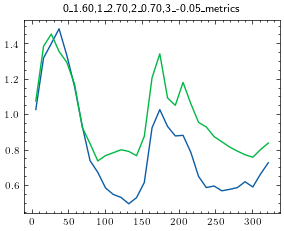

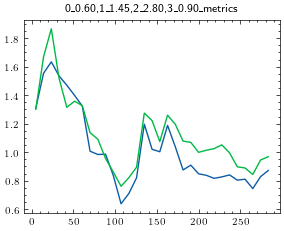

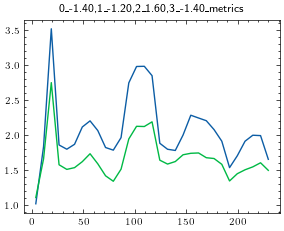

In [54]:
for i in range(-1,-10,-1):
  plt.title(f'{samples[i].stem} abse: {sampe}')
  plt.plot(bins_trues[i], av_trues[i])
  plt.plot(bins_trues[i], av_roms[i])
  plt.show()

In [7]:
meshes_dist3 = dict(
  low=list(),
  med=list(),
  high=list(),
)
llim = [0,4]
mlim = [14,18]
hlim = [28,35]
hemo_odir_vmtk = Path('../aorta_lib/hemodyn/odir_noLATIN1_evaluate_vmtk')
samples = sorted(list(hemo_odir_vmtk.glob('*[!cl].vtp')))
for i in tqdm.tqdm(
        range(len(samples)),
        desc='Loading simulations', ncols=100):
  #print(samples[i])
  sample = samples[i]
  #m = pv.read(sample)
  name = '_'.join(sample.stem.split('_')[:-1])
  dist3 = df[df['name']==name].iloc[0]['dist3']
  keys = ['low','med','high']
  for kk,lim in enumerate([llim, mlim,hlim]):
    if dist3 >= lim[0] and dist3 <= lim[1]:
      meshes_dist3[keys[kk]].append(name)

Loading simulations: 100%|██████████████████████████████████████| 416/416 [00:00<00:00, 5259.60it/s]


In [8]:
df[df['name']==meshes_dist3['low'][0]]

,name,fold,abse,rmse,nmae,dist1,dist2,dist3,dist4,dist5,...,omega_17,omega_18,omega_19,omega_20,omega_21,omega_22,omega_23,omega_24,omega_25,group
383,0_0,4,0.110780,0.110780,0.032409,2.88608,2.88608,2.92782,2.94869,3.02026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIAG
799,0_0,4,0.047439,0.047439,0.097825,2.88608,2.88608,2.92782,2.94869,3.02026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIAG
1215,0_0,4,0.404261,0.404261,0.021751,2.88608,2.88608,2.92782,2.94869,3.02026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIAG


In [9]:
np.argsort([df[df['name'] == meshes_dist3['med'][i]]['nmae'].iloc[0] for i in range(len(meshes_dist3['med']))])

array([29, 31, 33, 34, 39, 32, 55, 41, 51, 36, 46, 43, 48, 50,  7, 27, 30,
       44, 47, 18, 38, 54, 62, 56, 40,  8, 20, 45, 58, 57, 37, 14,  3, 61,
       35, 23, 22, 11, 13, 25, 52, 42,  0,  1, 28, 21, 16, 59,  4, 12, 19,
        2,  6, 26,  5, 49,  9, 15, 24, 10, 53, 60, 17])

In [10]:
df[df['name']==meshes_dist3['med'][20]]

,name,fold,abse,rmse,nmae,dist1,dist2,dist3,dist4,dist5,...,omega_17,omega_18,omega_19,omega_20,omega_21,omega_22,omega_23,omega_24,omega_25,group
280,00172,3,0.276756,0.276756,0.050536,14.7003,16.904,17.6828,18.1352,18.4267,...,0.5231,-1.3415,-1.063,-0.4695,-0.2388,-0.7338,0.0276,-1.2328,0.4773,RG
696,00172,3,0.076175,0.076175,0.154014,14.7003,16.904,17.6828,18.1352,18.4267,...,0.5231,-1.3415,-1.063,-0.4695,-0.2388,-0.7338,0.0276,-1.2328,0.4773,RG
1112,00172,3,1.290170,1.290170,0.052928,14.7003,16.904,17.6828,18.1352,18.4267,...,0.5231,-1.3415,-1.063,-0.4695,-0.2388,-0.7338,0.0276,-1.2328,0.4773,RG


In [11]:
np.argsort([df[df['name'] == meshes_dist3['high'][i]]['nmae'].iloc[0] for i in range(len(meshes_dist3['high']))])

array([11, 19,  4, 10, 32, 17, 30, 20,  8,  3,  9, 23,  7, 16,  1, 13, 15,
       26, 14, 27, 12,  2, 24, 22,  0, 31, 18, 34, 25, 33, 21, 29,  5, 28,
        6])

In [12]:
df[df['name']==meshes_dist3['high'][23]]

,name,fold,abse,rmse,nmae,dist1,dist2,dist3,dist4,dist5,...,omega_17,omega_18,omega_19,omega_20,omega_21,omega_22,omega_23,omega_24,omega_25,group
309,"0_2.30,1_-2.55,2_-1.60,3_-2.70",3,0.300096,0.300096,0.071683,29.2352,29.4412,30.2374,31.1016,31.8368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LATIN2
725,"0_2.30,1_-2.55,2_-1.60,3_-2.70",3,0.065313,0.065313,0.131438,29.2352,29.4412,30.2374,31.1016,31.8368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LATIN2
1141,"0_2.30,1_-2.55,2_-1.60,3_-2.70",3,1.048500,1.048500,0.072943,29.2352,29.4412,30.2374,31.1016,31.8368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LATIN2


In [13]:
def plot_hemo(name,array_name,clims,cmap,camera_dist,):
  array_name_ = array_name.replace('_ROM_val','')
  m = pv.read(hemo_odir_vmtk / (name+'_metrics.vtp'))
  camera_center = m.center
  camera_center[-1] = m.points[:,-1].max() - shift_from_sa
  camera_direction = np.array([-1,+0.3,-0.2])
  camera_direction = camera_direction / np.linalg.norm(camera_direction)
  scale = 2 # to scale the image and increase the final resolution
  pl = pv.Plotter(window_size=(np.array([350,400])*scale).astype(int), off_screen=True)
  pl.add_mesh(m, scalars=array_name, clim=clims[array_name_], cmap=cmap)
  pl.remove_scalar_bar()
  pl.camera.position = camera_center - camera_direction * camera_dist
  pl.camera.focal_point = camera_center + camera_direction * camera_dist
  return pl.screenshot(None, return_img=True)

def plot_colorbar(ax,cmap,clims,title):
  norm = mpl.colors.Normalize(vmin=clims[0], vmax=clims[1])
  sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax, orientation='horizontal')
  cbar.set_label(title,fontsize=12)
  cbar.ax.tick_params(labelsize=10)
  return cbar, sm

/tmp/ipykernel_224533/3927537188.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


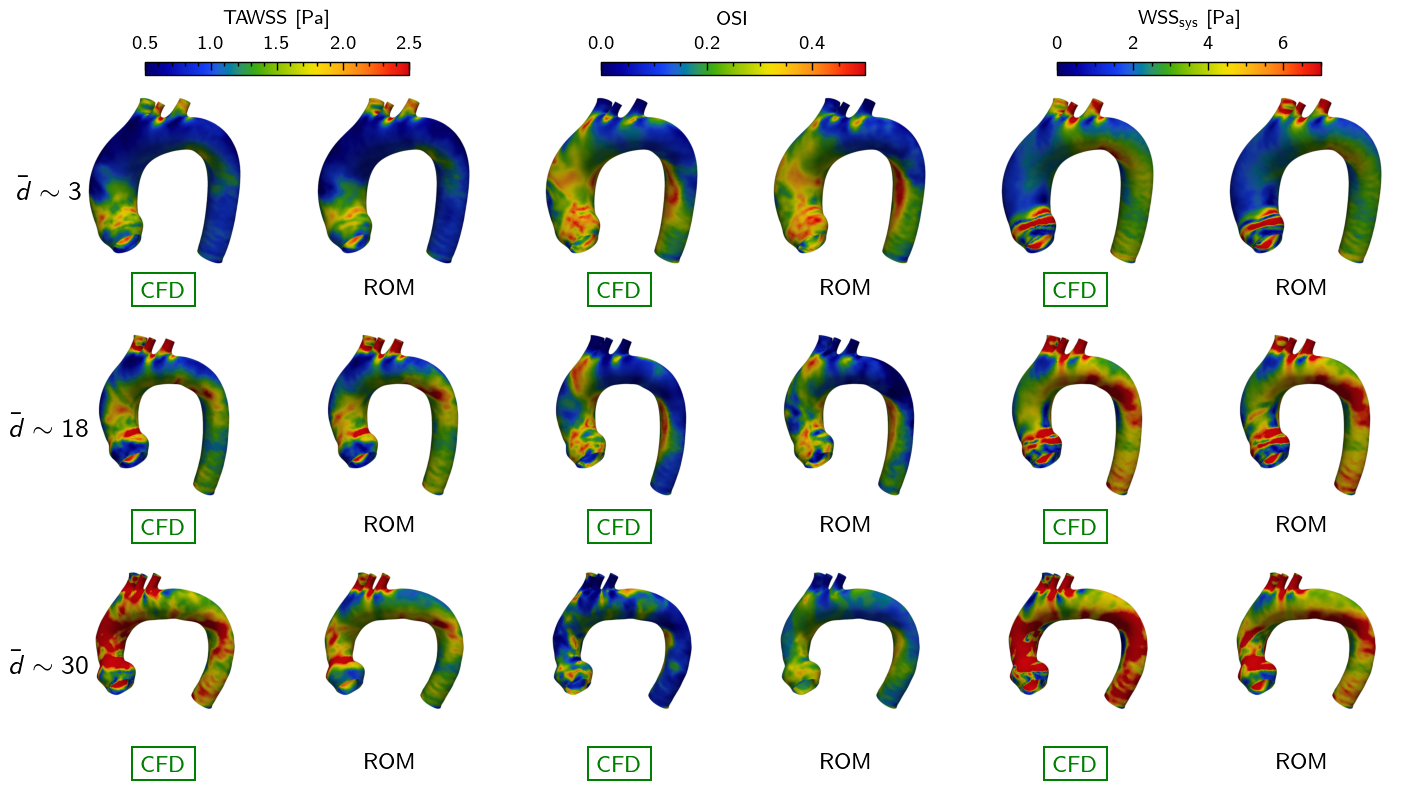

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

<Figure size 330x250 with 0 Axes>

In [16]:
array_names = ['tawss', 'osi', 'wss_sis']
labels = ['TAWSS', 'OSI', 'WSS$_{\\text{sys}}$']
units = [' [Pa]', '', ' [Pa]']
distc_label = ['$\\bar{{d}}\\sim {}$'.format(i) for i in ['3','18','30']]

clims = dict(
  tawss=[0.5,2.5],
  osi=[0,0.5],
  wss_sis=[0,7],
)
pv.set_plot_theme('document')
cmap = mpl.colormaps.get_cmap("cet_rainbow4")
camera_dist = 350
shift_from_sa = 80 #mm # set z coordinate as 120 mm from the sa vessels (max z coord found)

#figure_size = np.array((180,60)) * 0.0393701 # specify in mm and then convert to inches
figure_size = np.array([180,100]) * 0.0393701 # specify in mm and then convert to inches
fig, axs = plt.subplots(3,6,figsize=figure_size, dpi=200,layout="constrained" )

names = []
names.append(df[df['name']==meshes_dist3['low'][0]].iloc[0]['name'])
names.append(df[df['name']==meshes_dist3['med'][32]].iloc[0]['name'])
names.append(df[df['name']==meshes_dist3['high'][9]].iloc[0]['name'])


for nn in range(3):
  name = names[nn]
  for kk, array_name in enumerate(array_names):
    image = plot_hemo(name,array_name,clims,cmap,camera_dist,)
    image_rom = plot_hemo(name,array_name+'_ROM_val',clims,cmap,camera_dist,)

    if kk==0:
      axs[nn,kk*2 + 0].text(-0.1, 0.5, distc_label[nn],
        horizontalalignment='center', verticalalignment='center',
        transform=axs[nn,kk*2 + 0].transAxes, fontsize=10, color='black')

    axs[nn,kk*2 + 0].imshow(image)
    axs[nn,kk*2 + 0].axis('off')
    axs[nn,kk*2 + 0].text(0.5, 0.05, '$\\boxed{\\text{CFD}}$',
      horizontalalignment='center', verticalalignment='center',
      transform=axs[nn,kk*2 + 0].transAxes, fontsize=8, color='green')
    axs[nn,kk*2 + 1].imshow(image_rom)
    axs[nn,kk*2 + 1].axis('off')
    axs[nn,kk*2 + 1].text(0.5, 0.05, 'ROM',
      horizontalalignment='center', verticalalignment='center',
      transform=axs[nn,kk*2 + 1].transAxes, fontsize=8, color='black')
    if nn==0:
      # colorbar
      fig_, ax = plt.subplots()
      cbar,sm = plot_colorbar(ax,cmap,clims[array_name],labels[kk])
      fig_.clear()
      fig.colorbar(sm, ax=axs[nn,(kk*2):(kk*2 + 2)], shrink=0.6, orientation='horizontal', location='top', label=labels[kk]+units[kk])

fig.show()

19.7088

In [ ]:
from scipy.stats import binned_statistic_2d
from scipy.stats import binned_statistic
nbins = 31
bins = np.linspace(m['AbscissaMetric'].min(), m['AbscissaMetric'].max(), nbins)
bin_means, bin_edges, binnumber = binned_statistic(m['AbscissaMetric'], m['tawss'], statistic='mean', bins=bins)
bin_means, bin_edgesx, bin_edgesy, binnumber = binned_statistic_2d(m['AbscissaMetric'], m['AngularMetric'], m['tawss'], statistic='mean', bins=(31,20))
bin_centerx = (bin_edgesx[:-1] + bin_edgesx[1:]) / 2
bin_centery = (bin_edgesy[:-1] + bin_edgesy[1:]) / 2

In [8]:
#bins_true, av_true = utils.binned_stat(m['AbscissaMetric'], m['tawss'], 31)
binsx_true, binsy_true, av_true = utils.binned_stat(m['AbscissaMetric'], m['tawss'], 31, y=m['AngularMetric'])

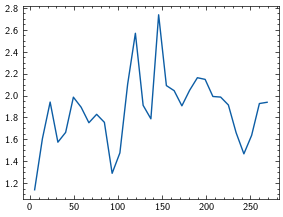

In [5]:
plt.plot(bins_true, av_true)

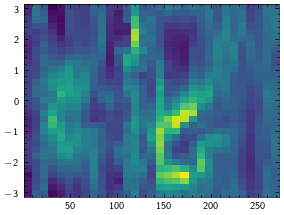

In [9]:
xx, yy = np.meshgrid(binsx_true,binsy_true)
plt.pcolormesh(xx,yy,av_true.T)


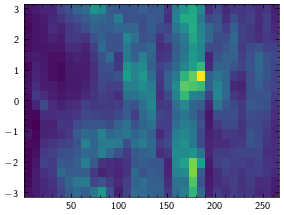

In [55]:
plt.pcolormesh(xx,yy,bin_means.T)
#plt.imshow(bin_means, )

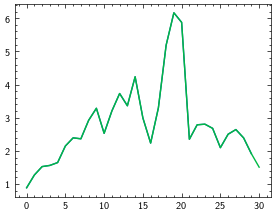

In [33]:
plt.plot(bin_means)
plt.plot(av_true)